# Importation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config IPCompleter.greedy=True
pd.options.display.float_format = '{:15.2f}'.format
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/Users/pablopavon/Documents/JOB_2023/ZeroG/BDA_Round2_Use_Case.csv')
df

,UNIQUE_CARRIER_NAME,YEAR,QUARTER,Overall - OP_EXPENSES,Overall - OP_PROFIT_LOSS,Overall - OP_REVENUES,Rev - CHARTER_PAX,Rev - CHARTER_PROP,Rev - MAIL,Rev - MISC_OP_REV,...,Rev - TRANS_REVENUE,Rev - TRANS_REV_PAX,Exp - AIRCFT_SERVICES,Exp - FLYING_OPS,Exp - GENERAL_ADMIN,Exp - GENERAL_SERVICES,Exp - MAINTENANCE,Exp - PAX_SERVICE,Exp - PROMOTION_SALES,Exp - TRANS_EXPENSES
0,Alaska Airlines Inc.,2000-01-01T00:00:00Z,2,401923.00,9956.00,411879.00,383.00,62.00,4027.00,633.00,...,16047.00,367177.00,67272.00,141834.00,23330.00,NaN,42537.00,34691.00,72250.00,2309.00
1,Spirit Air Lines,2013-01-01T00:00:00Z,1,39454.49,6109.28,45563.77,0.00,0.00,0.00,9730.22,...,318.45,28663.54,1198.90,24752.41,7359.33,0.00,2550.85,2083.05,732.05,0.00
2,Spirit Air Lines,2011-01-01T00:00:00Z,2,39994.74,5812.67,45807.41,0.00,0.00,0.00,6840.77,...,345.46,31849.75,5206.78,26597.43,2039.16,0.00,1918.55,1684.75,2336.36,0.00
3,Spirit Air Lines,2011-01-01T00:00:00Z,3,42239.23,7708.22,49947.44,0.00,0.00,0.00,8015.72,...,336.97,34077.98,5733.77,27231.96,1880.75,0.00,2714.60,1786.77,2674.57,0.00
4,Delta Air Lines Inc.,2008-01-01T00:00:00Z,1,3450398.00,-34938.00,3415460.00,16201.00,NaN,NaN,194283.00,...,1201298.00,1939209.00,393164.00,1026595.00,180677.00,NaN,209569.00,205360.00,217465.00,1035215.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,Delta Air Lines Inc.,2015-01-01T00:00:00Z,3,785237.00,-5999999.00,1055426.00,0.00,0.00,531.00,57838.00,...,46461.00,885785.00,132014.00,338700.00,86677.00,NaN,56007.00,69770.00,62809.00,3186.00
1771,United Air Lines Inc.,2015-01-01T00:00:00Z,3,1244965.22,-5999999.00,1488171.33,0.00,0.00,7547.08,3792.25,...,148718.68,1198111.92,145209.32,486244.56,140362.98,NaN,129864.44,153788.37,78801.26,24990.31
1772,American Airlines Inc.,2015-01-01T00:00:00Z,3,444575.17,-5999999.00,556136.86,0.00,0.00,4008.48,7855.38,...,171409.87,314206.28,52726.39,156217.17,46122.04,0.00,44290.61,37631.56,23114.39,65178.43
1773,Southwest Airlines Co.,2015-01-01T00:00:00Z,3,54250.00,-5999999.00,70485.00,160.00,0.00,0.00,6835.00,...,247.00,62508.00,9943.00,23100.00,4145.00,NaN,5715.00,4366.00,3281.00,278.00


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
QUARTER,1775.00,2.48,1.12,1.00,1.00,2.00,3.00,4.00
Overall - OP_EXPENSES,1775.00,1290355.25,1503357.99,5860.64,227928.52,723703.00,1453673.00,7635158.00
Overall - OP_PROFIT_LOSS,1775.00,54078.48,498480.63,-5999999.00,-17856.00,19109.86,110323.98,1649180.00
Overall - OP_REVENUES,1775.00,1372558.22,1668621.53,5539.21,229929.17,741627.00,1603017.39,8986257.00
Rev - CHARTER_PAX,1089.00,5709.11,14323.99,-395.23,0.00,656.12,3737.69,130539.00
Rev - CHARTER_PROP,946.00,1985.91,6423.84,-52.00,0.00,0.00,256.75,136525.00
Rev - MAIL,1689.00,4350.59,6102.60,-4646.00,62.00,1530.00,7074.00,42854.00
Rev - MISC_OP_REV,1748.00,31910.09,77230.80,-15011.00,1334.28,4270.24,17411.00,571011.00
Rev - PROP_BAG,1406.00,23313.21,44566.16,0.00,696.25,4857.38,24621.75,259421.00
Rev - PROP_FREIGHT,1731.00,163104.83,445488.53,-293.00,10320.20,35885.00,66314.29,2985171.00


In [4]:
df.columns = ['Airline', 'Date', 'Quarter', 'overall_expenses', 'profit_loss', 'overall_revenues', 'r_charter_pax', 
              'r_charter_prop', 'r_mail', 'r_miscellaneous_operating_rev', 'r_property_baggage', 'r_property_freight',
              'r_public_service', 'r_cancelling_fees', 'r_total_charter', 'r_unclassified_rev', 'r_total_property', 
              'r_transportation_rev', 'r_transportation_rev_per_passanger', 'exp_aircraft_services', 'exp_flying_operations',
              'exp_general_admin', 'exp_general_services', 'exp_maintenance', 'exp_passenger_service', 'exp_promotion_sales', 
              'exp_transportation_expenses']
df.head()             
              
              

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_charter_pax,r_charter_prop,r_mail,r_miscellaneous_operating_rev,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_general_services,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
0,Alaska Airlines Inc.,2000-01-01T00:00:00Z,2,401923.00,9956.00,411879.00,383.00,62.00,4027.00,633.00,...,16047.00,367177.00,67272.00,141834.00,23330.00,NaN,42537.00,34691.00,72250.00,2309.00
1,Spirit Air Lines,2013-01-01T00:00:00Z,1,39454.49,6109.28,45563.77,0.00,0.00,0.00,9730.22,...,318.45,28663.54,1198.90,24752.41,7359.33,0.00,2550.85,2083.05,732.05,0.00
2,Spirit Air Lines,2011-01-01T00:00:00Z,2,39994.74,5812.67,45807.41,0.00,0.00,0.00,6840.77,...,345.46,31849.75,5206.78,26597.43,2039.16,0.00,1918.55,1684.75,2336.36,0.00
3,Spirit Air Lines,2011-01-01T00:00:00Z,3,42239.23,7708.22,49947.44,0.00,0.00,0.00,8015.72,...,336.97,34077.98,5733.77,27231.96,1880.75,0.00,2714.60,1786.77,2674.57,0.00
4,Delta Air Lines Inc.,2008-01-01T00:00:00Z,1,3450398.00,-34938.00,3415460.00,16201.00,NaN,NaN,194283.00,...,1201298.00,1939209.00,393164.00,1026595.00,180677.00,NaN,209569.00,205360.00,217465.00,1035215.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Airline                             1775 non-null   object 
 1   Date                                1775 non-null   object 
 2   Quarter                             1775 non-null   int64  
 3   overall_expenses                    1775 non-null   float64
 4   profit_loss                         1775 non-null   float64
 5   overall_revenues                    1775 non-null   float64
 6   r_charter_pax                       1089 non-null   float64
 7   r_charter_prop                      946 non-null    float64
 8   r_mail                              1689 non-null   float64
 9   r_miscellaneous_operating_rev       1748 non-null   float64
 10  r_property_baggage                  1406 non-null   float64
 11  r_property_freight                  1731 no

It appears that the 'Date' column is not properly categorized as datetime64, as it is currently identified as an object datatype.

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

In [7]:
print(df['Date'].dtype)

datetime64[ns, UTC]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   Airline                             1775 non-null   object             
 1   Date                                1775 non-null   datetime64[ns, UTC]
 2   Quarter                             1775 non-null   int64              
 3   overall_expenses                    1775 non-null   float64            
 4   profit_loss                         1775 non-null   float64            
 5   overall_revenues                    1775 non-null   float64            
 6   r_charter_pax                       1089 non-null   float64            
 7   r_charter_prop                      946 non-null    float64            
 8   r_mail                              1689 non-null   float64            
 9   r_miscellaneous_operating_rev       1748 

In [9]:
df['Airline'].unique()

array(['            Alaska Airlines Inc.             ',
       '              Spirit Air Lines               ',
       '            Delta Air Lines Inc.             ',
       '            United Air Lines Inc.            ',
       '           American Airlines Inc.            ',
       '         Federal Express Corporation         ',
       '           Southwest Airlines Co.            ',
       '               JetBlue Airways               '], dtype=object)

It has been observed that the airline names contain excessive whitespace characters preceding and following the actual name. This issue needs to be rectified.

In [10]:
df['Airline'] = df['Airline'].apply(lambda airline: airline.strip())

In [11]:
list(df['Airline'].unique())

['Alaska Airlines Inc.',
 'Spirit Air Lines',
 'Delta Air Lines Inc.',
 'United Air Lines Inc.',
 'American Airlines Inc.',
 'Federal Express Corporation',
 'Southwest Airlines Co.',
 'JetBlue Airways']

Great, we will now commence with the analysis of the null values.

In [12]:
df.isna().sum().sort_values(ascending = False)

exp_general_services                  1631
r_total_charter                       1213
r_public_service                      1066
r_total_property                       870
r_unclassified_rev                     850
r_charter_prop                         829
r_charter_pax                          686
r_cancelling_fees                      557
r_property_baggage                     369
exp_passenger_service                  313
r_transportation_rev_per_passanger     313
exp_transportation_expenses            118
r_mail                                  86
r_transportation_rev                    82
r_property_freight                      44
r_miscellaneous_operating_rev           27
Date                                     0
overall_revenues                         0
profit_loss                              0
exp_aircraft_services                    0
exp_flying_operations                    0
exp_general_admin                        0
overall_expenses                         0
exp_mainten

After careful observation, it has been identified that certain columns in the dataset have a substantial number of null values. However, it is crucial to acknowledge that the 'overall_expenses' column is computed as the sum of all columns that begin with the prefix 'exp_'. Therefore, the unexpected presence of numerous null values in some of these columns warrants further investigation. Hence, it is recommended to revisit the dataframe 'df' and examine it thoroughly to identify any unusual patterns or anomalies that could explain this occurrence.

In [13]:
df

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_charter_pax,r_charter_prop,r_mail,r_miscellaneous_operating_rev,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_general_services,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
0,Alaska Airlines Inc.,2000-01-01 00:00:00+00:00,2,401923.00,9956.00,411879.00,383.00,62.00,4027.00,633.00,...,16047.00,367177.00,67272.00,141834.00,23330.00,NaN,42537.00,34691.00,72250.00,2309.00
1,Spirit Air Lines,2013-01-01 00:00:00+00:00,1,39454.49,6109.28,45563.77,0.00,0.00,0.00,9730.22,...,318.45,28663.54,1198.90,24752.41,7359.33,0.00,2550.85,2083.05,732.05,0.00
2,Spirit Air Lines,2011-01-01 00:00:00+00:00,2,39994.74,5812.67,45807.41,0.00,0.00,0.00,6840.77,...,345.46,31849.75,5206.78,26597.43,2039.16,0.00,1918.55,1684.75,2336.36,0.00
3,Spirit Air Lines,2011-01-01 00:00:00+00:00,3,42239.23,7708.22,49947.44,0.00,0.00,0.00,8015.72,...,336.97,34077.98,5733.77,27231.96,1880.75,0.00,2714.60,1786.77,2674.57,0.00
4,Delta Air Lines Inc.,2008-01-01 00:00:00+00:00,1,3450398.00,-34938.00,3415460.00,16201.00,NaN,NaN,194283.00,...,1201298.00,1939209.00,393164.00,1026595.00,180677.00,NaN,209569.00,205360.00,217465.00,1035215.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,Delta Air Lines Inc.,2015-01-01 00:00:00+00:00,3,785237.00,-5999999.00,1055426.00,0.00,0.00,531.00,57838.00,...,46461.00,885785.00,132014.00,338700.00,86677.00,NaN,56007.00,69770.00,62809.00,3186.00
1771,United Air Lines Inc.,2015-01-01 00:00:00+00:00,3,1244965.22,-5999999.00,1488171.33,0.00,0.00,7547.08,3792.25,...,148718.68,1198111.92,145209.32,486244.56,140362.98,NaN,129864.44,153788.37,78801.26,24990.31
1772,American Airlines Inc.,2015-01-01 00:00:00+00:00,3,444575.17,-5999999.00,556136.86,0.00,0.00,4008.48,7855.38,...,171409.87,314206.28,52726.39,156217.17,46122.04,0.00,44290.61,37631.56,23114.39,65178.43
1773,Southwest Airlines Co.,2015-01-01 00:00:00+00:00,3,54250.00,-5999999.00,70485.00,160.00,0.00,0.00,6835.00,...,247.00,62508.00,9943.00,23100.00,4145.00,NaN,5715.00,4366.00,3281.00,278.00


Certainly, it is recommended to examine one specific airline more closely to gain a better understanding of the data. This approach will allow us to identify any patterns or issues that may not be apparent when considering the entire dataset as a whole.


Alright, we will begin by analyzing the data for Alaska Airlines Inc. and determining if there are any particular issues or inconsistencies that need to be addressed.

In [14]:
df.sort_values(['Airline','Date', 'Quarter'])

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_charter_pax,r_charter_prop,r_mail,r_miscellaneous_operating_rev,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_general_services,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
357,Alaska Airlines Inc.,2000-01-01 00:00:00+00:00,1,369283.00,-8748.00,360535.00,1120.00,NaN,3584.00,312.00,...,16940.00,318119.00,63749.00,144410.00,22126.00,NaN,39583.00,33681.00,45638.00,3580.00
609,Alaska Airlines Inc.,2000-01-01 00:00:00+00:00,1,40808.00,-6207.00,34601.00,NaN,NaN,136.00,44.00,...,NaN,32885.00,6267.00,16504.00,2469.00,NaN,5246.00,3612.00,4602.00,NaN
0,Alaska Airlines Inc.,2000-01-01 00:00:00+00:00,2,401923.00,9956.00,411879.00,383.00,62.00,4027.00,633.00,...,16047.00,367177.00,67272.00,141834.00,23330.00,NaN,42537.00,34691.00,72250.00,2309.00
960,Alaska Airlines Inc.,2000-01-01 00:00:00+00:00,2,35935.00,-1400.00,34535.00,NaN,NaN,228.00,71.00,...,NaN,32885.00,5373.00,13060.00,2099.00,NaN,4451.00,3005.00,6308.00,NaN
1173,Alaska Airlines Inc.,2000-01-01 00:00:00+00:00,3,429546.00,35805.00,465351.00,531.00,NaN,4255.00,1090.00,...,15411.00,419121.00,74328.00,158996.00,25670.00,NaN,48046.00,41204.00,57543.00,2670.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,United Air Lines Inc.,2019-01-01 00:00:00+00:00,1,1281337.46,-755.00,1280582.47,4675.00,NaN,13358.36,274.26,...,60567.87,1048333.37,178752.35,513419.63,102519.34,NaN,93374.61,176228.52,88811.44,22734.05
822,United Air Lines Inc.,2019-01-01 00:00:00+00:00,2,1639899.23,425318.01,2065217.24,-2.18,NaN,8304.99,367.72,...,52875.47,1820738.05,231552.95,645205.26,149784.63,NaN,119396.29,225206.73,111331.74,31341.33
959,United Air Lines Inc.,2019-01-01 00:00:00+00:00,2,6178351.21,908783.06,7087134.27,18796.19,NaN,15920.91,2070.05,...,2365684.79,4396984.74,1166726.48,1644534.47,457339.06,NaN,478200.31,420645.34,338853.66,1404466.00
1067,United Air Lines Inc.,2019-01-01 00:00:00+00:00,2,861197.58,81315.90,942513.49,373.11,NaN,576.50,167.83,...,105463.58,775190.76,150105.44,314129.36,69171.23,NaN,72230.91,82100.24,56351.27,66769.16


Upon closer examination of the data for Alaska Airlines Inc., it has been discovered that there are duplicate values for the quarter. Additionally, the 'Date' column only contains the year component that varies across entries, with a constant month and day of 01-01. As a result, it is safe to assume that the quarter and year values are accurate, but the month and day values may not be reliable. Furthermore, certain rows within the same quarter contain null values, while others have actual values.

It is likely that this inconsistency arose during the data export process. To address this issue, we will merge the rows based on the following criteria: 
* Airline 
* Year
* Quarter. 

Subsequently, we will re-evaluate the null values.

As part of the data preparation process, we will divide the dataframe into eight different dataframes, one for each airline. This approach will allow us to analyze and study each airline's data separately.

# Join duplicated quarters per year

In [15]:
df2 = df.copy()

In [16]:
Alaska_Airlines = df2[df2['Airline'] == 'Alaska Airlines Inc.'].copy()
Spirit = df2[df2['Airline'] == 'Spirit Air Lines'].copy()
Delta = df2[df2['Airline'] == 'Delta Air Lines Inc.'].copy()
United = df2[df2['Airline'] == 'United Air Lines Inc.'].copy()
American_Airlines = df2[df2['Airline'] == 'American Airlines Inc.'].copy()
Fedex = df2[df2['Airline'] == 'Federal Express Corporation'].copy()
Southwest = df2[df2['Airline'] == 'Southwest Airlines Co.'].copy()
JetBlue = df2[df2['Airline'] == 'JetBlue Airways'].copy()

## Join the duplicated data

### Alaska_Airlines

In [17]:
Alaska_Airlines['Year'] = Alaska_Airlines['Date'].dt.year
Alaska_Airlines['Date'] = Alaska_Airlines['Date'].dt.year
Alaska_Airlines = Alaska_Airlines.drop('Year', axis=1)
Alaska_Airlines = Alaska_Airlines.sort_values(['Date', 'Quarter'])
Alaska_Airlines = Alaska_Airlines.groupby(['Airline', 'Date', 'Quarter']).agg('sum').reset_index()

In [18]:
Alaska_Airlines.head(10)

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_charter_pax,r_charter_prop,r_mail,r_miscellaneous_operating_rev,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_general_services,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
0,Alaska Airlines Inc.,2000,1,410091.00,-14955.00,395136.00,1120.00,0.00,3720.00,356.00,...,16940.00,351004.00,70016.00,160914.00,24595.00,0.00,44829.00,37293.00,50240.00,3580.00
1,Alaska Airlines Inc.,2000,2,437858.00,8556.00,446414.00,383.00,62.00,4255.00,704.00,...,16047.00,400062.00,72645.00,154894.00,25429.00,0.00,46988.00,37696.00,78558.00,2309.00
2,Alaska Airlines Inc.,2000,3,453373.00,33682.00,487055.00,531.00,0.00,4491.00,1162.00,...,15411.00,439744.00,78298.00,168292.00,27103.00,0.00,51014.00,43435.00,60299.00,2670.00
3,Alaska Airlines Inc.,2000,4,470920.00,-39658.00,431262.00,377.00,0.00,4851.00,-184.00,...,15617.00,386355.00,80849.00,178512.00,27724.00,0.00,61284.00,37198.00,59402.00,2316.00
4,Alaska Airlines Inc.,2001,1,452360.00,-31641.00,420719.00,1144.00,0.00,4824.00,-346.00,...,16994.00,376011.00,82584.00,164764.00,27577.00,0.00,53078.00,40845.00,57834.00,2586.00
5,Alaska Airlines Inc.,2001,2,463113.00,11452.00,474565.00,1180.00,113.00,5784.00,1628.00,...,18045.00,422795.00,83930.00,166830.00,28139.00,0.00,54277.00,40609.00,61396.00,3333.00
6,Alaska Airlines Inc.,2001,3,467872.00,16483.00,484355.00,1165.00,0.00,6036.00,400.00,...,21481.00,430399.00,86679.00,169407.00,25521.00,0.00,54281.00,42087.00,58913.00,4316.00
7,Alaska Airlines Inc.,2001,4,444502.00,-61078.00,383424.00,2164.00,0.00,5627.00,-43.00,...,18728.00,335548.00,90753.00,146664.00,28562.00,0.00,52050.00,41952.00,53272.00,1969.00
8,Alaska Airlines Inc.,2002,1,454186.00,-41767.00,412419.00,1250.00,0.00,4491.00,-292.00,...,20775.00,364393.00,89796.00,150345.00,23522.00,0.00,57029.00,47018.00,55442.00,3474.00
9,Alaska Airlines Inc.,2002,2,482086.00,-3389.00,478697.00,902.00,87.00,5869.00,103.00,...,24105.00,422811.00,95751.00,161111.00,25590.00,0.00,59012.00,51654.00,59337.00,1814.00


### Spirit

In [20]:
Spirit['Year'] = Spirit['Date'].dt.year
Spirit['Date'] = Spirit['Date'].dt.year
Spirit = Spirit.drop('Year', axis=1)
Spirit = Spirit.sort_values(['Date', 'Quarter'])
Spirit = Spirit.groupby(['Airline', 'Date', 'Quarter']).agg('sum').reset_index()

In [21]:
Spirit.head(10)

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_charter_pax,r_charter_prop,r_mail,r_miscellaneous_operating_rev,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_general_services,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
0,Spirit Air Lines,2000,1,78912.57,2636.05,81548.62,4647.74,0.00,6.45,6428.39,...,0.00,70455.84,11805.54,31185.73,1923.30,0.00,15331.36,4628.64,9245.75,0.00
1,Spirit Air Lines,2000,2,72759.93,3713.22,76473.15,5452.61,0.00,2.60,3118.14,...,0.00,67895.30,10244.69,28742.13,2007.50,0.00,13295.96,4481.34,8996.25,0.00
2,Spirit Air Lines,2000,3,72244.03,-3451.18,68792.86,5951.17,0.00,13.59,3045.92,...,0.00,59769.26,10330.54,28616.29,2089.35,0.00,13428.92,4677.47,8476.89,0.00
3,Spirit Air Lines,2000,4,86047.74,-625.53,85422.21,5317.46,0.00,21.21,4636.18,...,0.00,75427.71,12294.67,35484.10,2337.87,0.00,15171.22,5904.71,10264.15,0.00
4,Spirit Air Lines,2001,1,92424.47,6606.38,99030.84,1371.99,0.00,29.93,5747.28,...,0.00,91839.81,16365.50,37578.06,2368.82,0.00,16048.99,5609.96,11030.73,0.00
5,Spirit Air Lines,2001,2,95594.45,7701.94,103296.39,1626.96,0.00,15.15,0.00,...,0.00,96984.21,15935.71,38918.71,3401.99,0.00,16042.03,5804.80,11932.72,0.00
6,Spirit Air Lines,2001,3,97055.28,1639.26,98694.54,1294.05,0.00,37.91,4693.04,...,0.00,81812.69,18693.54,38152.04,1873.03,0.00,17141.10,6105.85,11166.91,0.00
7,Spirit Air Lines,2001,4,80226.38,-6055.62,74170.76,3503.85,0.00,13.89,4613.96,...,0.00,55224.00,14189.41,30156.82,3097.89,0.00,15766.20,5547.74,7637.17,0.00
8,Spirit Air Lines,2002,1,89569.38,3587.78,93157.16,1844.88,0.00,22.66,4651.42,...,0.00,86604.23,15554.52,31388.84,4032.20,0.00,16061.85,6677.74,11426.02,0.00
9,Spirit Air Lines,2002,2,99333.85,-205.09,99128.77,1915.84,0.00,36.71,4803.42,...,0.00,92317.72,16873.01,36697.80,4358.19,0.00,18100.34,6820.54,11761.89,0.00


### Delta

In [22]:
Delta['Year'] = Delta['Date'].dt.year
Delta['Date'] = Delta['Date'].dt.year
Delta = Delta.drop('Year', axis=1)
Delta = Delta.sort_values(['Date', 'Quarter'])
Delta = Delta.groupby(['Airline', 'Date', 'Quarter']).agg('sum').reset_index()

In [23]:
Delta.head(10)

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_charter_pax,r_charter_prop,r_mail,r_miscellaneous_operating_rev,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_general_services,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
0,Delta Air Lines Inc.,2000,1,3322170.00,273440.00,3595610.00,4957.00,0.00,41378.00,69482.00,...,136784.00,3239594.00,617897.00,987695.00,177288.00,0.00,342155.00,396843.00,461737.00,69177.00
1,Delta Air Lines Inc.,2000,2,3396023.00,577433.00,3973456.00,7122.00,0.00,43304.00,60214.00,...,-133725.00,3889760.00,632569.00,1029906.00,211774.00,0.00,374385.00,425596.00,366667.00,81698.00
2,Delta Air Lines Inc.,2000,3,3561875.00,476356.00,4038231.00,0.00,0.00,38933.00,120401.00,...,129633.00,3642243.00,641124.00,1094247.00,205814.00,0.00,390580.00,437434.00,447353.00,91638.00
3,Delta Air Lines Inc.,2000,4,3581425.00,132128.00,3713553.00,0.00,0.00,44793.00,89885.00,...,94978.00,3366420.00,628848.00,1157834.00,201030.00,0.00,408765.00,422908.00,384541.00,97783.00
4,Delta Air Lines Inc.,2001,1,3696303.00,-127171.00,3569132.00,0.00,0.00,35846.00,67968.00,...,120923.00,3236189.00,680561.00,1153344.00,214952.00,0.00,412883.00,440641.00,420580.00,77639.00
5,Delta Air Lines Inc.,2001,2,3687072.00,23907.00,3710979.00,0.00,0.00,37064.00,66240.00,...,138905.00,3367919.00,660174.00,1109598.00,241899.00,0.00,356120.00,449731.00,460073.00,107944.00
6,Delta Air Lines Inc.,2001,3,3568312.00,-310626.00,3257686.00,0.00,0.00,27929.00,65465.00,...,135937.00,2933716.00,651030.00,1090039.00,195792.00,0.00,361399.00,434048.00,420553.00,127210.00
7,Delta Air Lines Inc.,2001,4,3231483.00,-558092.00,2673391.00,0.00,0.00,20306.00,60440.00,...,150237.00,2337850.00,629283.00,942938.00,180209.00,0.00,319455.00,384328.00,362192.00,136826.00
8,Delta Air Lines Inc.,2002,1,3333088.00,-409841.00,2923247.00,7185.00,0.00,24061.00,93575.00,...,173536.00,2536594.00,617459.00,967634.00,262899.00,0.00,325233.00,350698.00,372125.00,168019.00
9,Delta Air Lines Inc.,2002,2,3380982.00,-155744.00,3225238.00,11361.00,0.00,22608.00,96344.00,...,191184.00,2812836.00,608708.00,1046902.00,241761.00,0.00,328393.00,368114.00,359624.00,155507.00


In [24]:
United['Year'] = United['Date'].dt.year
United['Date'] = United['Date'].dt.year
United = United.drop('Year', axis=1)
United = United.sort_values(['Date', 'Quarter'])
United = United.groupby(['Airline', 'Date', 'Quarter']).agg('sum').reset_index()

In [25]:
United.tail(50)

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_charter_pax,r_charter_prop,r_mail,r_miscellaneous_operating_rev,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_general_services,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
28,United Air Lines Inc.,2007,1,4463404.00,-89250.00,4374154.00,3975.00,0.00,22627.00,9935.00,...,941828.00,3154006.00,582536.00,1426906.00,253755.00,0.00,532837.00,360175.00,302686.00,784533.00
29,United Air Lines Inc.,2007,2,4670249.00,526162.00,5196411.00,2474.00,0.00,25254.00,11201.00,...,1046816.00,3857181.00,581967.00,1596965.00,225734.00,0.00,543674.00,372002.00,314845.00,807804.00
30,United Air Lines Inc.,2007,3,4869389.00,635381.00,5504770.00,4948.00,0.00,27970.00,12699.00,...,1045432.00,4148894.00,568614.00,1709387.00,253296.00,0.00,561910.00,383346.00,327816.00,818662.00
31,United Air Lines Inc.,2007,4,5093682.00,-119923.00,4973759.00,4676.00,0.00,34789.00,11626.00,...,953346.00,3685630.00,604179.00,1835844.00,340031.00,0.00,558952.00,377275.00,302490.00,842527.00
32,United Air Lines Inc.,2008,1,5151770.00,-440562.00,4711208.00,4872.00,0.00,30972.00,10247.00,...,948659.00,3434254.00,596012.00,1973405.00,269708.00,0.00,573572.00,333569.00,342557.00,842413.00
33,United Air Lines Inc.,2008,2,5594445.00,-223919.00,5370526.00,12411.00,0.00,31086.00,12208.00,...,1034166.00,3962106.00,558554.00,2257139.00,420839.00,0.00,545633.00,378603.00,305486.00,911333.00
34,United Air Lines Inc.,2008,3,6075511.00,-468673.00,5606838.00,26180.00,0.00,27685.00,12832.00,...,1107935.00,4101862.00,570749.00,2883932.00,267095.00,0.00,494707.00,377508.00,285750.00,953247.00
35,United Air Lines Inc.,2008,4,5161929.00,-613253.00,4548676.00,32214.00,0.00,32391.00,10660.00,...,955679.00,3229493.00,549995.00,2223753.00,315456.00,0.00,452590.00,346848.00,247146.00,804422.00
36,United Air Lines Inc.,2009,1,3829409.00,-135835.00,3693574.00,12694.00,0.00,26537.00,9051.00,...,868387.00,2541899.00,540327.00,1185242.00,196233.00,0.00,450621.00,322710.00,202070.00,721773.00
37,United Air Lines Inc.,2009,2,3847878.00,172174.00,4020052.00,2496.00,0.00,22228.00,9997.00,...,959127.00,2779727.00,540990.00,1043479.00,268638.00,0.00,461952.00,330577.00,224933.00,765994.00


### American_Airlines

In [26]:
American_Airlines['Year'] = American_Airlines['Date'].dt.year
American_Airlines['Date'] = American_Airlines['Date'].dt.year
American_Airlines = American_Airlines.drop('Year', axis=1)
American_Airlines = American_Airlines.sort_values(['Date', 'Quarter'])
American_Airlines = American_Airlines.groupby(['Airline', 'Date', 'Quarter']).agg('sum').reset_index()

In [27]:
American_Airlines.head(10)

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_charter_pax,r_charter_prop,r_mail,r_miscellaneous_operating_rev,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_general_services,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
0,American Airlines Inc.,2000,1,4016153.00,185888.00,4202041.00,3265.00,0.00,36262.00,31604.00,...,226971.00,3767124.00,702912.00,1181158.00,170150.00,0.00,533154.00,528681.00,602487.00,42474.00
1,American Airlines Inc.,2000,2,4140238.00,469936.00,4610174.00,2091.00,0.00,37251.00,33289.00,...,204452.00,4183997.00,723971.00,1213115.00,160258.00,0.00,547649.00,558514.00,619242.00,57906.00
2,American Airlines Inc.,2000,3,4316393.00,516188.00,4832581.00,2024.00,0.00,37949.00,33509.00,...,224056.00,4382916.00,745257.00,1307524.00,173575.00,0.00,555611.00,567729.00,614277.00,80571.00
3,American Airlines Inc.,2000,4,4401347.00,70981.00,4472328.00,2812.00,0.00,43069.00,28661.00,...,205061.00,4036858.00,774881.00,1386508.00,172079.00,0.00,577733.00,561145.00,579328.00,72893.00
4,American Airlines Inc.,2001,1,4372707.00,4874.00,4377581.00,3386.00,0.00,38915.00,24263.00,...,239653.00,3928421.00,746696.00,1338644.00,225704.00,0.00,596714.00,550023.00,569034.00,66141.00
5,American Airlines Inc.,2001,2,5084653.00,-681492.00,4403161.00,6178.00,0.00,38003.00,28180.00,...,220550.00,3967938.00,785907.00,1359827.00,851386.00,0.00,572273.00,569005.00,579426.00,77873.00
6,American Airlines Inc.,2001,3,4873788.00,-1072244.00,3801544.00,2299.00,0.00,29211.00,25804.00,...,184927.00,3437616.00,757042.00,1290295.00,788750.00,0.00,604835.00,552848.00,513347.00,60585.00
7,American Airlines Inc.,2001,4,3865453.00,-808945.00,3056508.00,4737.00,0.00,26940.00,10104.00,...,150645.00,2749534.00,726293.00,1101614.00,203544.00,0.00,549703.00,513756.00,427367.00,41559.00
8,American Airlines Inc.,2002,1,4530278.00,-722468.00,3807810.00,6900.00,0.00,31316.00,12791.00,...,169776.00,3477204.00,862329.00,1314966.00,342834.00,0.00,669236.00,610321.00,392873.00,33557.00
9,American Airlines Inc.,2002,2,4740856.00,-630442.00,4110414.00,4440.00,0.00,29510.00,15944.00,...,196658.00,3742665.00,859506.00,1472041.00,228510.00,0.00,712527.00,661218.00,472214.00,36307.00


### Fedex

In [28]:
Fedex['Year'] = Fedex['Date'].dt.year
Fedex['Date'] = Fedex['Date'].dt.year
Fedex = Fedex.drop('Year', axis=1)
Fedex = Fedex.sort_values(['Date', 'Quarter'])
Fedex = Fedex.groupby(['Airline', 'Date', 'Quarter']).agg('sum').reset_index()

In [29]:
Fedex.head(10)

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_charter_pax,r_charter_prop,r_mail,r_miscellaneous_operating_rev,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_general_services,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
0,Federal Express Corporation,2000,1,3623975.00,201347.00,3825322.00,0.00,25149.00,4025.00,158518.00,...,2014278.00,0.00,354788.00,601887.00,159757.00,0.00,321936.00,0.00,91378.00,1908337.00
1,Federal Express Corporation,2000,2,3621439.00,297678.00,3919117.00,0.00,35630.00,4078.00,131563.00,...,2093588.00,0.00,348622.00,581885.00,206040.00,0.00,308493.00,0.00,79946.00,1924036.00
2,Federal Express Corporation,2000,3,3618958.00,254594.00,3873552.00,0.00,32936.00,3647.00,153485.00,...,2045544.00,0.00,352721.00,611579.00,259932.00,0.00,301695.00,0.00,50170.00,1900295.00
3,Federal Express Corporation,2000,4,3732783.00,245734.00,3978517.00,0.00,36507.00,5157.00,162766.00,...,2074089.00,0.00,370653.00,682338.00,262843.00,0.00,288626.00,0.00,49793.00,1934147.00
4,Federal Express Corporation,2001,1,3609237.00,225733.00,3834970.00,0.00,18147.00,4130.00,153265.00,...,2024940.00,0.00,352482.00,632745.00,240878.00,0.00,296832.00,0.00,49000.00,1894208.00
5,Federal Express Corporation,2001,2,3678901.00,58953.00,3737854.00,0.00,20223.00,3863.00,132451.00,...,1885379.00,0.00,384814.00,637716.00,290411.00,0.00,344736.00,0.00,44894.00,1833767.00
6,Federal Express Corporation,2001,3,3579649.00,53913.00,3633562.00,0.00,24123.00,5123.00,120542.00,...,1833025.00,0.00,364558.00,627636.00,268119.00,0.00,329135.00,0.00,43964.00,1806191.00
7,Federal Express Corporation,2001,4,3520657.00,439890.00,3960547.00,0.00,45697.00,10522.00,127781.00,...,1941483.00,0.00,407536.00,643894.00,209183.00,0.00,340863.00,0.00,43918.00,1735404.00
8,Federal Express Corporation,2002,1,3664956.00,149621.00,3814577.00,0.00,17489.00,7586.00,118992.00,...,1835371.00,0.00,378688.00,646294.00,307692.00,0.00,370608.00,0.00,43525.00,1773067.00
9,Federal Express Corporation,2002,2,3775729.00,177339.00,3953068.00,0.00,10881.00,6992.00,122785.00,...,1882862.00,0.00,402396.00,675114.00,313603.00,0.00,384695.00,0.00,44003.00,1811475.00


### Southwest

In [30]:
Southwest['Year'] = Southwest['Date'].dt.year
Southwest['Date'] = Southwest['Date'].dt.year
Southwest = Southwest.drop('Year', axis=1)
Southwest = Southwest.sort_values(['Date', 'Quarter'])
Southwest = Southwest.groupby(['Airline', 'Date', 'Quarter']).agg('sum').reset_index()

In [31]:
Southwest.head(10)

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_charter_pax,r_charter_prop,r_mail,r_miscellaneous_operating_rev,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_general_services,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
0,Southwest Airlines Co.,2000,1,1087164.00,155498.00,1242662.00,5294.00,0.00,11424.00,23045.00,...,2561.00,1184151.00,177603.00,360500.00,133557.00,0.00,125610.00,69406.00,148714.00,4115.00
1,Southwest Airlines Co.,2000,2,1146067.00,314624.00,1460691.00,7435.00,0.00,10330.00,22802.00,...,0.00,1399062.00,185391.00,361151.00,161732.00,0.00,124225.00,72288.00,168214.00,4583.00
2,Southwest Airlines Co.,2000,3,1178776.00,300072.00,1478848.00,9586.00,0.00,10589.00,26168.00,...,2707.00,1411667.00,200364.00,362705.00,167569.00,0.00,134892.00,74684.00,162276.00,4813.00
3,Southwest Airlines Co.,2000,4,1217112.00,250308.00,1467420.00,6970.00,0.00,11449.00,26480.00,...,2852.00,1402579.00,201193.00,411775.00,137901.00,0.00,133557.00,79403.00,174551.00,4228.00
4,Southwest Airlines Co.,2001,1,1218721.00,209911.00,1428632.00,6908.00,0.00,10699.00,31614.00,...,2947.00,1360766.00,212782.00,409115.00,136262.00,0.00,137568.00,82148.00,156763.00,6431.00
5,Southwest Airlines Co.,2001,2,1262767.00,291033.00,1553800.00,9171.00,0.00,9742.00,32210.00,...,2973.00,1483807.00,216836.00,411250.00,161698.00,0.00,143202.00,82636.00,164042.00,4929.00
6,Southwest Airlines Co.,2001,3,1242100.00,93040.00,1335140.00,8272.00,0.00,6932.00,32587.00,...,2850.00,1269858.00,228337.00,401106.00,147403.00,0.00,148806.00,85536.00,144657.00,4572.00
7,Southwest Airlines Co.,2001,4,1200468.00,37195.00,1237663.00,4216.00,0.00,5508.00,33794.00,...,3382.00,1175824.00,243884.00,365778.00,131199.00,0.00,134817.00,97747.00,143807.00,3072.00
8,Southwest Airlines Co.,2002,1,1207650.00,49608.00,1257258.00,4551.00,0.00,6135.00,38299.00,...,3212.00,1189810.00,255149.00,377101.00,105347.00,0.00,138382.00,109329.00,134632.00,3154.00
9,Southwest Airlines Co.,2002,2,1283705.00,189107.00,1472812.00,5221.00,0.00,4978.00,41712.00,...,3144.00,1399889.00,250195.00,405033.00,129136.00,0.00,144448.00,119315.00,145755.00,3312.00


### JetBlue

In [32]:
JetBlue['Year'] = JetBlue['Date'].dt.year
JetBlue['Date'] = JetBlue['Date'].dt.year
JetBlue = JetBlue.drop('Year', axis=1)
JetBlue = JetBlue.sort_values(['Date', 'Quarter'])
JetBlue = JetBlue.groupby(['Airline', 'Date', 'Quarter']).agg('sum').reset_index()

In [33]:
JetBlue.head(10)

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_charter_pax,r_charter_prop,r_mail,r_miscellaneous_operating_rev,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_general_services,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
0,JetBlue Airways,2000,1,14753.40,-8284.64,6468.76,0.00,0.00,0.00,8.63,...,0.00,6307.59,2609.19,3702.16,3433.81,0.00,958.40,930.66,2758.98,0.00
1,JetBlue Airways,2000,2,22867.57,-6675.16,16192.41,0.00,0.00,0.00,30.42,...,0.00,15799.74,4415.27,6664.98,3652.10,0.00,1410.83,1309.61,4916.81,0.00
2,JetBlue Airways,2000,3,34743.91,-1310.14,33433.77,0.00,0.00,0.00,71.38,...,0.00,32507.05,6583.12,12084.10,4084.31,0.00,1394.76,2142.55,7073.27,0.00
3,JetBlue Airways,2000,4,47717.83,1435.26,49153.09,12.15,0.00,44.52,97.95,...,0.00,47680.91,9778.70,17132.18,5204.31,0.00,1964.42,3186.21,8487.65,0.00
4,JetBlue Airways,2001,1,55253.98,8595.87,63849.85,0.00,0.00,174.00,0.00,...,157.69,61961.39,11499.61,19661.85,7835.64,0.00,2422.77,3612.63,8091.22,0.00
5,JetBlue Airways,2001,2,67338.75,11058.76,78397.51,0.00,0.00,238.89,0.00,...,303.33,76155.51,14182.05,25524.72,9159.84,0.00,2840.50,4038.81,9286.50,0.00
6,JetBlue Airways,2001,3,71274.04,11334.33,82608.37,31.08,0.00,211.57,0.00,...,211.32,80274.36,16212.61,29308.61,2460.15,0.00,4749.27,5289.79,10529.37,0.00
7,JetBlue Airways,2001,4,91057.50,4500.57,95558.07,0.00,0.00,327.86,0.00,...,376.11,92107.24,18690.06,33474.28,12227.05,0.00,4872.12,6477.85,12034.78,0.00
8,JetBlue Airways,2002,1,109991.27,23377.79,133369.07,0.00,0.00,340.36,0.00,...,802.37,129090.81,26571.61,36940.91,9777.94,0.00,6519.41,11066.85,14402.15,0.00
9,JetBlue Airways,2002,2,121595.29,27707.95,149303.24,15.82,0.00,396.37,0.00,...,1227.61,144294.98,25659.18,43473.62,10777.79,0.00,6156.15,13467.94,16366.01,0.00


## Merge them into one DF

In [34]:
dataframe_names = ['Alaska_Airlines', 'Spirit', 'Delta', 'United', 'American_Airlines', 'Fedex', 'Southwest', 'JetBlue']


In [35]:
dataframe_list = [eval(name) for name in dataframe_names]

In [36]:
final_df = pd.concat(dataframe_list, ignore_index=True)

In [37]:
final_df.head()

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_charter_pax,r_charter_prop,r_mail,r_miscellaneous_operating_rev,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_general_services,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
0,Alaska Airlines Inc.,2000,1,410091.00,-14955.00,395136.00,1120.00,0.00,3720.00,356.00,...,16940.00,351004.00,70016.00,160914.00,24595.00,0.00,44829.00,37293.00,50240.00,3580.00
1,Alaska Airlines Inc.,2000,2,437858.00,8556.00,446414.00,383.00,62.00,4255.00,704.00,...,16047.00,400062.00,72645.00,154894.00,25429.00,0.00,46988.00,37696.00,78558.00,2309.00
2,Alaska Airlines Inc.,2000,3,453373.00,33682.00,487055.00,531.00,0.00,4491.00,1162.00,...,15411.00,439744.00,78298.00,168292.00,27103.00,0.00,51014.00,43435.00,60299.00,2670.00
3,Alaska Airlines Inc.,2000,4,470920.00,-39658.00,431262.00,377.00,0.00,4851.00,-184.00,...,15617.00,386355.00,80849.00,178512.00,27724.00,0.00,61284.00,37198.00,59402.00,2316.00
4,Alaska Airlines Inc.,2001,1,452360.00,-31641.00,420719.00,1144.00,0.00,4824.00,-346.00,...,16994.00,376011.00,82584.00,164764.00,27577.00,0.00,53078.00,40845.00,57834.00,2586.00


# Cleaning null values

In [38]:
final_df.isna().sum().sort_values(ascending = False)

Airline                               0
r_total_charter                       0
exp_promotion_sales                   0
exp_passenger_service                 0
exp_maintenance                       0
exp_general_services                  0
exp_general_admin                     0
exp_flying_operations                 0
exp_aircraft_services                 0
r_transportation_rev_per_passanger    0
r_transportation_rev                  0
r_total_property                      0
r_unclassified_rev                    0
r_cancelling_fees                     0
Date                                  0
r_public_service                      0
r_property_freight                    0
r_property_baggage                    0
r_miscellaneous_operating_rev         0
r_mail                                0
r_charter_prop                        0
r_charter_pax                         0
overall_revenues                      0
profit_loss                           0
overall_expenses                      0


After performing data cleaning and merging all duplicated values for each airline, all null values have been successfully eliminated from the dataset. However, it is important to note that the presence of null values does not necessarily imply the absence of zero values. To investigate this further, we can examine the number of rows in the dataset where the value is equal to zero.

In [39]:
zero_counts = df.apply(lambda x: x.eq(0).sum(), axis=0).sort_values(ascending = False)
zero_counts

r_public_service                      610
r_charter_prop                        589
r_charter_pax                         328
r_mail                                267
exp_general_services                  142
exp_transportation_expenses           107
r_property_baggage                     88
r_property_freight                     79
r_cancelling_fees                      47
r_transportation_rev                   46
r_miscellaneous_operating_rev          36
exp_general_admin                       2
exp_aircraft_services                   0
exp_promotion_sales                     0
exp_passenger_service                   0
exp_maintenance                         0
Quarter                                 0
exp_flying_operations                   0
r_transportation_rev_per_passanger      0
overall_revenues                        0
r_total_property                        0
r_unclassified_rev                      0
r_total_charter                         0
Date                              

Following a detailed analysis of the dataset, we have identified certain columns that are no longer necessary and can be safely removed from the dataset. Therefore, it has been determined that the following columns will be deleted:

* r_public_service
* r_charter_prop
* r_charter_pax
* r_mail
* exp_general_services

In real life, we wouldn't just delete those columns. It's very important to ask in the datasource why those columns are empty, but in order to be able to continue the analysis, we will delete those cathegories as we can't ask the datasource what happened.

In [40]:
to_delete = ['r_public_service', 'r_charter_prop', 'r_charter_pax', 'r_mail','exp_general_services']
final_df = final_df.drop(to_delete, axis=1)

In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Airline                             624 non-null    object 
 1   Date                                624 non-null    int64  
 2   Quarter                             624 non-null    int64  
 3   overall_expenses                    624 non-null    float64
 4   profit_loss                         624 non-null    float64
 5   overall_revenues                    624 non-null    float64
 6   r_miscellaneous_operating_rev       624 non-null    float64
 7   r_property_baggage                  624 non-null    float64
 8   r_property_freight                  624 non-null    float64
 9   r_cancelling_fees                   624 non-null    float64
 10  r_total_charter                     624 non-null    float64
 11  r_unclassified_rev                  624 non-n

Now that we have merged all the data frames, we have noticed that the 'Date' column has reverted to its original datatype, which is int64. In order to accurately represent the dates, we will need to convert this column to a datetime64 datatype.

In [42]:
final_df['Date'] = pd.to_datetime(final_df['Date'], format='%Y')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Airline                             624 non-null    object        
 1   Date                                624 non-null    datetime64[ns]
 2   Quarter                             624 non-null    int64         
 3   overall_expenses                    624 non-null    float64       
 4   profit_loss                         624 non-null    float64       
 5   overall_revenues                    624 non-null    float64       
 6   r_miscellaneous_operating_rev       624 non-null    float64       
 7   r_property_baggage                  624 non-null    float64       
 8   r_property_freight                  624 non-null    float64       
 9   r_cancelling_fees                   624 non-null    float64       
 10  r_total_charter           

In [43]:
final_df.tail()

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_miscellaneous_operating_rev,r_property_baggage,r_property_freight,r_cancelling_fees,...,r_total_property,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
619,JetBlue Airways,2018-01-01,2,1756871.71,171150.64,1928022.35,6644.30,77752.21,15.80,39371.62,...,0.00,74593.88,1729646.09,299555.75,735290.37,107726.30,229720.52,147651.28,116363.81,639.00
620,JetBlue Airways,2018-01-01,3,1878984.52,128958.94,2007943.47,8754.93,86537.66,8.55,39657.42,...,0.00,70449.54,1802257.68,311263.74,871442.62,94806.16,213416.01,147680.26,114198.97,847.02
621,JetBlue Airways,2018-01-01,4,1747773.93,220947.63,1968721.55,5685.62,84432.97,28.01,41222.67,...,0.00,81391.60,1755130.90,296355.91,763275.00,117870.43,174950.33,147788.05,118333.05,450.01
622,JetBlue Airways,2019-01-01,1,1787983.63,83295.87,1871279.49,5952.72,84590.55,20.66,44930.21,...,0.00,74096.57,1661462.43,328342.61,744842.41,121654.66,202449.58,158576.83,107621.94,373.03
623,JetBlue Airways,2019-01-01,2,1855553.56,249869.81,2105423.38,6688.48,89859.60,7.02,49595.52,...,0.00,78653.72,1880619.03,324514.68,792966.01,118523.34,216245.95,161939.99,113550.71,567.58


It has been observed that the data for the year 2019 is incomplete. As we are analyzing complete years, this inconsistency may lead to issues in the future. Therefore, it is recommended to remove all information pertaining to the year 2019 from the dataset.

In [44]:
final_df = final_df[final_df['Date'].dt.year != 2019]
final_df

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_miscellaneous_operating_rev,r_property_baggage,r_property_freight,r_cancelling_fees,...,r_total_property,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses
0,Alaska Airlines Inc.,2000-01-01,1,410091.00,-14955.00,395136.00,356.00,793.00,14069.00,6834.00,...,14862.00,16940.00,351004.00,70016.00,160914.00,24595.00,44829.00,37293.00,50240.00,3580.00
1,Alaska Airlines Inc.,2000-01-01,2,437858.00,8556.00,446414.00,704.00,1130.00,15763.00,7708.00,...,16893.00,16047.00,400062.00,72645.00,154894.00,25429.00,46988.00,37696.00,78558.00,2309.00
2,Alaska Airlines Inc.,2000-01-01,3,453373.00,33682.00,487055.00,1162.00,1375.00,15362.00,8679.00,...,16737.00,15411.00,439744.00,78298.00,168292.00,27103.00,51014.00,43435.00,60299.00,2670.00
3,Alaska Airlines Inc.,2000-01-01,4,470920.00,-39658.00,431262.00,-184.00,1210.00,13841.00,8550.00,...,15051.00,15617.00,386355.00,80849.00,178512.00,27724.00,61284.00,37198.00,59402.00,2316.00
4,Alaska Airlines Inc.,2001-01-01,1,452360.00,-31641.00,420719.00,-346.00,909.00,13477.00,7376.00,...,14386.00,16994.00,376011.00,82584.00,164764.00,27577.00,53078.00,40845.00,57834.00,2586.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,JetBlue Airways,2017-01-01,4,1566867.94,189373.56,1756241.50,5290.52,72418.49,0.00,35659.88,...,0.00,78105.42,1564387.16,272951.79,585942.64,163244.26,194330.33,126297.34,105028.96,54.96
618,JetBlue Airways,2018-01-01,1,1624441.40,129322.26,1753763.65,6144.32,72466.46,0.00,39439.30,...,0.00,65296.30,1570121.47,298798.66,660421.89,106954.03,185660.50,146918.49,108082.71,633.37
619,JetBlue Airways,2018-01-01,2,1756871.71,171150.64,1928022.35,6644.30,77752.21,15.80,39371.62,...,0.00,74593.88,1729646.09,299555.75,735290.37,107726.30,229720.52,147651.28,116363.81,639.00
620,JetBlue Airways,2018-01-01,3,1878984.52,128958.94,2007943.47,8754.93,86537.66,8.55,39657.42,...,0.00,70449.54,1802257.68,311263.74,871442.62,94806.16,213416.01,147680.26,114198.97,847.02


Certainly, it is crucial to ensure the accuracy of the final values in the 'overall_expenses', 'profit_loss', and 'overall_revenues' columns, as these are crucial metrics for evaluating the financial performance of the company. Therefore, we will perform a thorough validation process to confirm that these values are correct and consistent with the company's financial records.

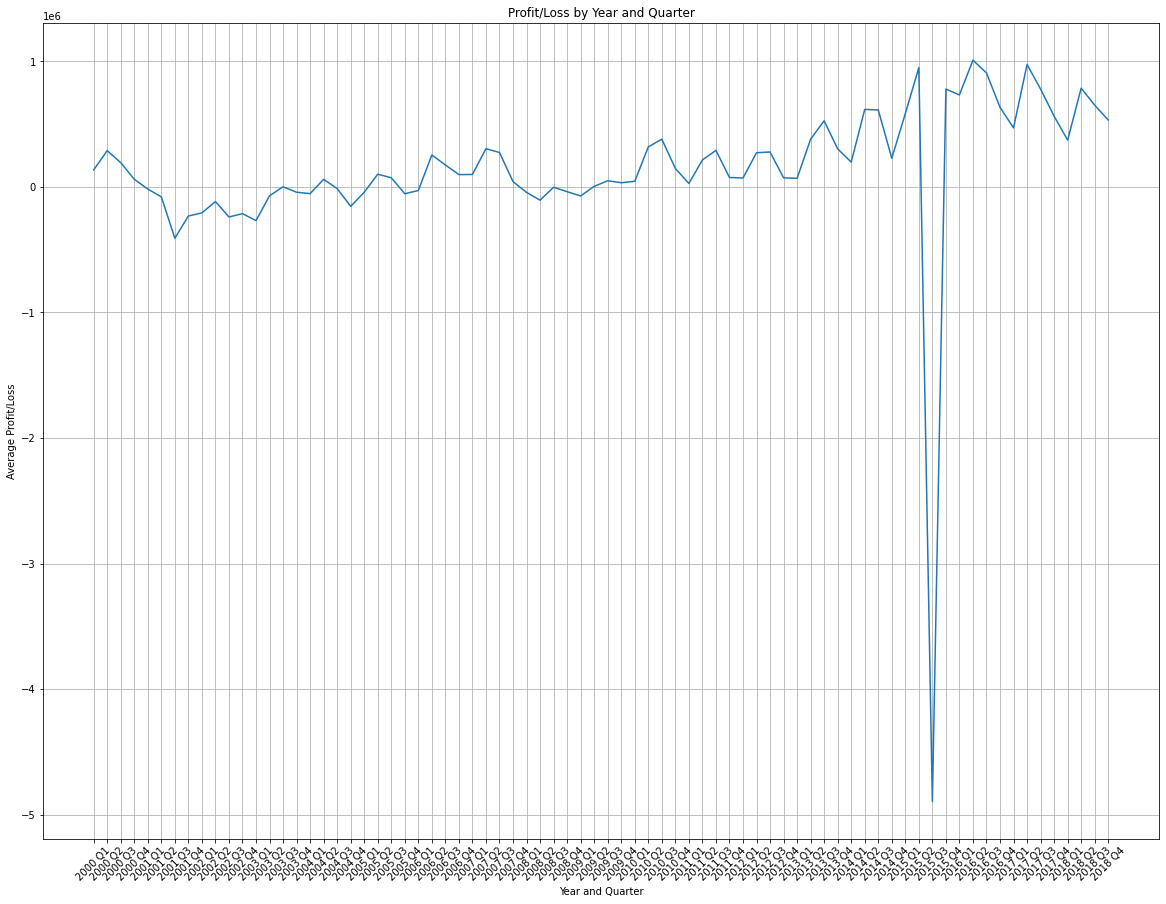

In [45]:
final_df['Year'] = final_df['Date'].dt.year

grouped_data = final_df.groupby(['Year', 'Quarter'])['profit_loss'].mean().reset_index()

plt.figure(figsize=(20, 15))
plt.plot(grouped_data['Year'].astype(str) + ' Q' + grouped_data['Quarter'].astype(str), grouped_data['profit_loss'])
plt.xticks(rotation=45)
plt.xlabel('Year and Quarter')
plt.ylabel('Average Profit/Loss')
plt.title('Profit/Loss by Year and Quarter')
plt.grid()
plt.show()


Given that the 'profit_loss' column for the year 2015 appears to be incorrect, it is important to validate the data in the 'overall_revenues' and 'overall_expenses' columns as well. Therefore, we will perform a detailed examination of these columns to ensure that the values are accurate and consistent with the company's financial records.

It has been identified that there may be an anomaly in the data for the year 2015. As per the provided information, the 'profit_loss' column should be computed as the difference between the 'overall_revenues' and 'overall_expenses' columns. To investigate this further, we will recalculate the 'profit_loss' column for the year 2015 and analyze the results to determine if there are any discrepancies or issues with the data.

**overall_expenses**

In [46]:
expense_columns = [col for col in final_df.columns if col.startswith('exp_')]
final_df['overall_expenses'] = final_df[expense_columns].sum(axis=1)
final_df

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_miscellaneous_operating_rev,r_property_baggage,r_property_freight,r_cancelling_fees,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses,Year
0,Alaska Airlines Inc.,2000-01-01,1,391467.00,-14955.00,395136.00,356.00,793.00,14069.00,6834.00,...,16940.00,351004.00,70016.00,160914.00,24595.00,44829.00,37293.00,50240.00,3580.00,2000
1,Alaska Airlines Inc.,2000-01-01,2,418519.00,8556.00,446414.00,704.00,1130.00,15763.00,7708.00,...,16047.00,400062.00,72645.00,154894.00,25429.00,46988.00,37696.00,78558.00,2309.00,2000
2,Alaska Airlines Inc.,2000-01-01,3,431111.00,33682.00,487055.00,1162.00,1375.00,15362.00,8679.00,...,15411.00,439744.00,78298.00,168292.00,27103.00,51014.00,43435.00,60299.00,2670.00,2000
3,Alaska Airlines Inc.,2000-01-01,4,447285.00,-39658.00,431262.00,-184.00,1210.00,13841.00,8550.00,...,15617.00,386355.00,80849.00,178512.00,27724.00,61284.00,37198.00,59402.00,2316.00,2000
4,Alaska Airlines Inc.,2001-01-01,1,429268.00,-31641.00,420719.00,-346.00,909.00,13477.00,7376.00,...,16994.00,376011.00,82584.00,164764.00,27577.00,53078.00,40845.00,57834.00,2586.00,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,JetBlue Airways,2017-01-01,4,1447850.28,189373.56,1756241.50,5290.52,72418.49,0.00,35659.88,...,78105.42,1564387.16,272951.79,585942.64,163244.26,194330.33,126297.34,105028.96,54.96,2017
618,JetBlue Airways,2018-01-01,1,1507469.65,129322.26,1753763.65,6144.32,72466.46,0.00,39439.30,...,65296.30,1570121.47,298798.66,660421.89,106954.03,185660.50,146918.49,108082.71,633.37,2018
619,JetBlue Airways,2018-01-01,2,1636947.03,171150.64,1928022.35,6644.30,77752.21,15.80,39371.62,...,74593.88,1729646.09,299555.75,735290.37,107726.30,229720.52,147651.28,116363.81,639.00,2018
620,JetBlue Airways,2018-01-01,3,1753654.78,128958.94,2007943.47,8754.93,86537.66,8.55,39657.42,...,70449.54,1802257.68,311263.74,871442.62,94806.16,213416.01,147680.26,114198.97,847.02,2018


**overall_revenues**

In [47]:
revenues_columns = [col for col in final_df.columns if col.startswith('r_')]
final_df['overall_revenues'] = final_df[revenues_columns].sum(axis=1)
final_df

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_miscellaneous_operating_rev,r_property_baggage,r_property_freight,r_cancelling_fees,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses,Year
0,Alaska Airlines Inc.,2000-01-01,1,391467.00,-14955.00,413168.00,356.00,793.00,14069.00,6834.00,...,16940.00,351004.00,70016.00,160914.00,24595.00,44829.00,37293.00,50240.00,3580.00,2000
1,Alaska Airlines Inc.,2000-01-01,2,418519.00,8556.00,467164.00,704.00,1130.00,15763.00,7708.00,...,16047.00,400062.00,72645.00,154894.00,25429.00,46988.00,37696.00,78558.00,2309.00,2000
2,Alaska Airlines Inc.,2000-01-01,3,431111.00,33682.00,508842.00,1162.00,1375.00,15362.00,8679.00,...,15411.00,439744.00,78298.00,168292.00,27103.00,51014.00,43435.00,60299.00,2670.00,2000
3,Alaska Airlines Inc.,2000-01-01,4,447285.00,-39658.00,449183.00,-184.00,1210.00,13841.00,8550.00,...,15617.00,386355.00,80849.00,178512.00,27724.00,61284.00,37198.00,59402.00,2316.00,2000
4,Alaska Airlines Inc.,2001-01-01,1,429268.00,-31641.00,436981.00,-346.00,909.00,13477.00,7376.00,...,16994.00,376011.00,82584.00,164764.00,27577.00,53078.00,40845.00,57834.00,2586.00,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,JetBlue Airways,2017-01-01,4,1447850.28,189373.56,1755861.47,5290.52,72418.49,0.00,35659.88,...,78105.42,1564387.16,272951.79,585942.64,163244.26,194330.33,126297.34,105028.96,54.96,2017
618,JetBlue Airways,2018-01-01,1,1507469.65,129322.26,1753467.85,6144.32,72466.46,0.00,39439.30,...,65296.30,1570121.47,298798.66,660421.89,106954.03,185660.50,146918.49,108082.71,633.37,2018
619,JetBlue Airways,2018-01-01,2,1636947.03,171150.64,1928023.90,6644.30,77752.21,15.80,39371.62,...,74593.88,1729646.09,299555.75,735290.37,107726.30,229720.52,147651.28,116363.81,639.00,2018
620,JetBlue Airways,2018-01-01,3,1753654.78,128958.94,2007665.78,8754.93,86537.66,8.55,39657.42,...,70449.54,1802257.68,311263.74,871442.62,94806.16,213416.01,147680.26,114198.97,847.02,2018


In [48]:
final_df['profit_loss'] = final_df['overall_revenues'] - final_df['overall_expenses']

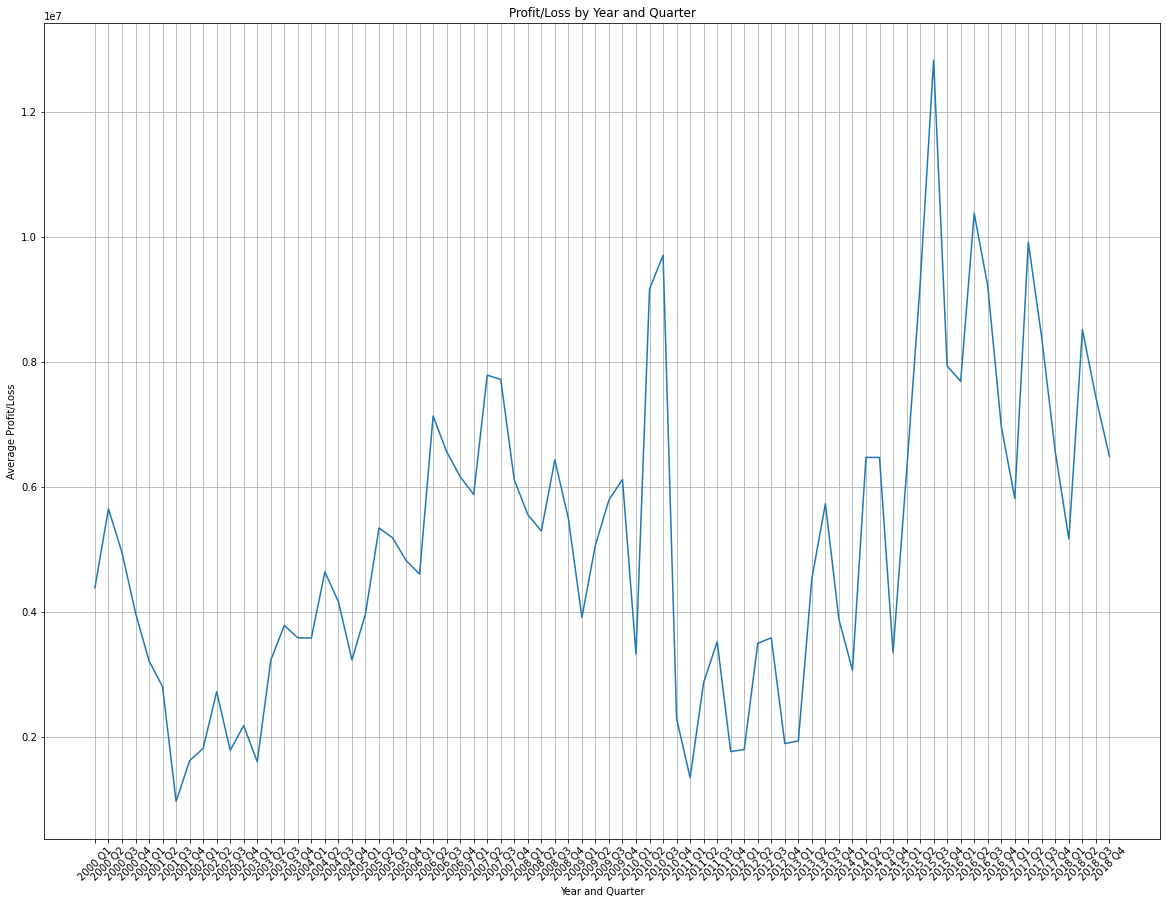

In [49]:
final_df['Year'] = final_df['Date'].dt.year

grouped_data = final_df.groupby(['Year', 'Quarter'])['profit_loss'].sum().reset_index()

plt.figure(figsize=(20, 15))
plt.plot(grouped_data['Year'].astype(str) + ' Q' + grouped_data['Quarter'].astype(str), grouped_data['profit_loss'])
plt.xticks(rotation=45)
plt.xlabel('Year and Quarter')
plt.ylabel('Average Profit/Loss')
plt.title('Profit/Loss by Year and Quarter')
plt.grid()
plt.show()

It has been noted that the values we are currently analyzing are **not** the final values, as each year and quarter represents the sum of every airline in the dataset. Therefore, this graph **cannot** be considered as a definitive metric for future analysis. However, it can be inferred that the issue with the data for the year 2015 has been successfully resolved.

## Filling Zero values ussing machine learning

In [50]:
zero_counts = final_df.apply(lambda x: x.eq(0).sum(), axis=0).sort_values(ascending = False)
zero_counts

r_total_charter                       305
r_total_property                      276
r_unclassified_rev                    266
r_cancelling_fees                     212
r_property_baggage                    111
exp_transportation_expenses            87
exp_passenger_service                  76
r_transportation_rev_per_passanger     76
r_property_freight                     62
r_transportation_rev                   46
r_miscellaneous_operating_rev          21
exp_general_admin                       1
exp_flying_operations                   0
exp_promotion_sales                     0
exp_maintenance                         0
Airline                                 0
exp_aircraft_services                   0
Date                                    0
overall_revenues                        0
profit_loss                             0
overall_expenses                        0
Quarter                                 0
Year                                    0
dtype: int64

Upon careful analysis of the dataset, it has become apparent that there are still a considerable number of zero values present, and it is unclear why this information is missing. It is possible that the company has discontinued certain services or shifted their expenses and revenues to other categories. While we do not have access to this information, we still wish to continue with the analysis and derive meaningful insights from the data. To achieve this, we have decided to leverage machine learning techniques to predict the correct values for these zero entries and enable us to continue with the analysis.

We Will Apply this to the following columns: 
* r_total_charter
* r_total_property
* r_unclassified_rev
* r_cancelling_fees

### Gral

In [51]:
def get_correlated_columns(df, column_name):
    correlations = df.corr()[column_name].abs()
    top_correlated_columns = correlations.nlargest(6).index.tolist()
    if column_name in top_correlated_columns:
        top_correlated_columns.remove(column_name)
    return top_correlated_columns

def impute_column(final_df, column_name):
    final_df.loc[final_df[column_name] == 0, column_name] = np.nan  
    imputed_final_df = pd.DataFrame(columns=final_df.columns)
    
    for airline_name in final_df['Airline'].unique():
        airline_data = final_df[final_df['Airline'] == airline_name].copy()
        
        top_correlated_columns = get_correlated_columns(final_df, column_name)
        
        train_data = airline_data[airline_data[column_name].notna()][top_correlated_columns]
        target_data = airline_data[airline_data[column_name].notna()][column_name]
        
        if not train_data.empty:
            rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
            rf.fit(train_data, target_data)
            
            missing_data = airline_data[airline_data[column_name].isna()][top_correlated_columns]
            
            if not missing_data.empty:  
                predicted_values = rf.predict(missing_data)
                airline_data.loc[airline_data[column_name].isna(), column_name] = predicted_values
        
        imputed_final_df = pd.concat([imputed_final_df, airline_data], ignore_index=True)
    
    return imputed_final_df

In [52]:
columns_to_impute = ['r_total_charter', 'r_total_property', 'r_unclassified_rev', 'r_cancelling_fees']

In [53]:
for column in columns_to_impute:
    imputed_final_df = impute_column(final_df, column)
    final_df[column] = imputed_final_df[column]

In [54]:
expense_columns = [col for col in final_df.columns if col.startswith('exp_')]
final_df['overall_expenses'] = final_df[expense_columns].sum(axis=1)

revenues_columns = [col for col in final_df.columns if col.startswith('r_')]
final_df['overall_revenues'] = final_df[revenues_columns].sum(axis=1)

final_df['profit_loss'] = final_df['overall_revenues'] - final_df['overall_expenses']

In [55]:
final_df

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_miscellaneous_operating_rev,r_property_baggage,r_property_freight,r_cancelling_fees,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses,Year
0,Alaska Airlines Inc.,2000-01-01,1,391467.00,21701.00,413168.00,356.00,793.00,14069.00,6834.00,...,16940.00,351004.00,70016.00,160914.00,24595.00,44829.00,37293.00,50240.00,3580.00,2000
1,Alaska Airlines Inc.,2000-01-01,2,418519.00,48645.00,467164.00,704.00,1130.00,15763.00,7708.00,...,16047.00,400062.00,72645.00,154894.00,25429.00,46988.00,37696.00,78558.00,2309.00,2000
2,Alaska Airlines Inc.,2000-01-01,3,431111.00,77731.00,508842.00,1162.00,1375.00,15362.00,8679.00,...,15411.00,439744.00,78298.00,168292.00,27103.00,51014.00,43435.00,60299.00,2670.00,2000
3,Alaska Airlines Inc.,2000-01-01,4,447285.00,1898.00,449183.00,-184.00,1210.00,13841.00,8550.00,...,15617.00,386355.00,80849.00,178512.00,27724.00,61284.00,37198.00,59402.00,2316.00,2000
4,Alaska Airlines Inc.,2001-01-01,1,429268.00,7713.00,436981.00,-346.00,909.00,13477.00,7376.00,...,16994.00,376011.00,82584.00,164764.00,27577.00,53078.00,40845.00,57834.00,2586.00,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,JetBlue Airways,2017-01-01,4,1447850.28,272351.31,1720201.59,5290.52,72418.49,0.00,NaN,...,78105.42,1564387.16,272951.79,585942.64,163244.26,194330.33,126297.34,105028.96,54.96,2017
618,JetBlue Airways,2018-01-01,1,1507469.65,206558.90,1714028.55,6144.32,72466.46,0.00,NaN,...,65296.30,1570121.47,298798.66,660421.89,106954.03,185660.50,146918.49,108082.71,633.37,2018
619,JetBlue Airways,2018-01-01,2,1636947.03,251705.25,1888652.28,6644.30,77752.21,15.80,NaN,...,74593.88,1729646.09,299555.75,735290.37,107726.30,229720.52,147651.28,116363.81,639.00,2018
620,JetBlue Airways,2018-01-01,3,1753654.78,214353.58,1968008.36,8754.93,86537.66,8.55,NaN,...,70449.54,1802257.68,311263.74,871442.62,94806.16,213416.01,147680.26,114198.97,847.02,2018


# Change months

In [56]:
import pandas as pd

def update_month(row):
    year = row['Date'].year
    quarter = row['Quarter']

    if quarter == 1:
        month = 1
    elif quarter == 2:
        month = 4
    elif quarter == 3:
        month = 7
    elif quarter == 4:
        month = 10

    return pd.Timestamp(year, month, 1)

final_df['Date'] = final_df.apply(update_month, axis=1)


In [57]:
final_df

,Airline,Date,Quarter,overall_expenses,profit_loss,overall_revenues,r_miscellaneous_operating_rev,r_property_baggage,r_property_freight,r_cancelling_fees,...,r_transportation_rev,r_transportation_rev_per_passanger,exp_aircraft_services,exp_flying_operations,exp_general_admin,exp_maintenance,exp_passenger_service,exp_promotion_sales,exp_transportation_expenses,Year
0,Alaska Airlines Inc.,2000-01-01,1,391467.00,21701.00,413168.00,356.00,793.00,14069.00,6834.00,...,16940.00,351004.00,70016.00,160914.00,24595.00,44829.00,37293.00,50240.00,3580.00,2000
1,Alaska Airlines Inc.,2000-04-01,2,418519.00,48645.00,467164.00,704.00,1130.00,15763.00,7708.00,...,16047.00,400062.00,72645.00,154894.00,25429.00,46988.00,37696.00,78558.00,2309.00,2000
2,Alaska Airlines Inc.,2000-07-01,3,431111.00,77731.00,508842.00,1162.00,1375.00,15362.00,8679.00,...,15411.00,439744.00,78298.00,168292.00,27103.00,51014.00,43435.00,60299.00,2670.00,2000
3,Alaska Airlines Inc.,2000-10-01,4,447285.00,1898.00,449183.00,-184.00,1210.00,13841.00,8550.00,...,15617.00,386355.00,80849.00,178512.00,27724.00,61284.00,37198.00,59402.00,2316.00,2000
4,Alaska Airlines Inc.,2001-01-01,1,429268.00,7713.00,436981.00,-346.00,909.00,13477.00,7376.00,...,16994.00,376011.00,82584.00,164764.00,27577.00,53078.00,40845.00,57834.00,2586.00,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,JetBlue Airways,2017-10-01,4,1447850.28,272351.31,1720201.59,5290.52,72418.49,0.00,NaN,...,78105.42,1564387.16,272951.79,585942.64,163244.26,194330.33,126297.34,105028.96,54.96,2017
618,JetBlue Airways,2018-01-01,1,1507469.65,206558.90,1714028.55,6144.32,72466.46,0.00,NaN,...,65296.30,1570121.47,298798.66,660421.89,106954.03,185660.50,146918.49,108082.71,633.37,2018
619,JetBlue Airways,2018-04-01,2,1636947.03,251705.25,1888652.28,6644.30,77752.21,15.80,NaN,...,74593.88,1729646.09,299555.75,735290.37,107726.30,229720.52,147651.28,116363.81,639.00,2018
620,JetBlue Airways,2018-07-01,3,1753654.78,214353.58,1968008.36,8754.93,86537.66,8.55,NaN,...,70449.54,1802257.68,311263.74,871442.62,94806.16,213416.01,147680.26,114198.97,847.02,2018


# Exportation

Great! As the final step, we will save the cleaned and pre-processed dataframe to a CSV file. This file can then be used for further analysis to derive insights and make data-driven decisions.

In [58]:
final_df.to_csv('final_df_Zero_G.csv', index=False)

In [67]:
final_df.to_excel('final_df_Zero_G.xlsx', index = False)